# LEFT TO DO
https://medium.com/analytics-vidhya/how-to-measure-the-non-linear-correlation-between-multiple-variables-804d896760b8
Multi-Variate Non-Linear Coorelation Matrix

In [2]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [15]:

cols = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine',
        'serum_sodium','sex','smoking','time','DEATH_EVENT']

df = pd.read_csv('../../../HeartFailure_Database/heart_failure_clinical_records_dataset.csv')
print(df.shape)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

(299, 13)
                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.

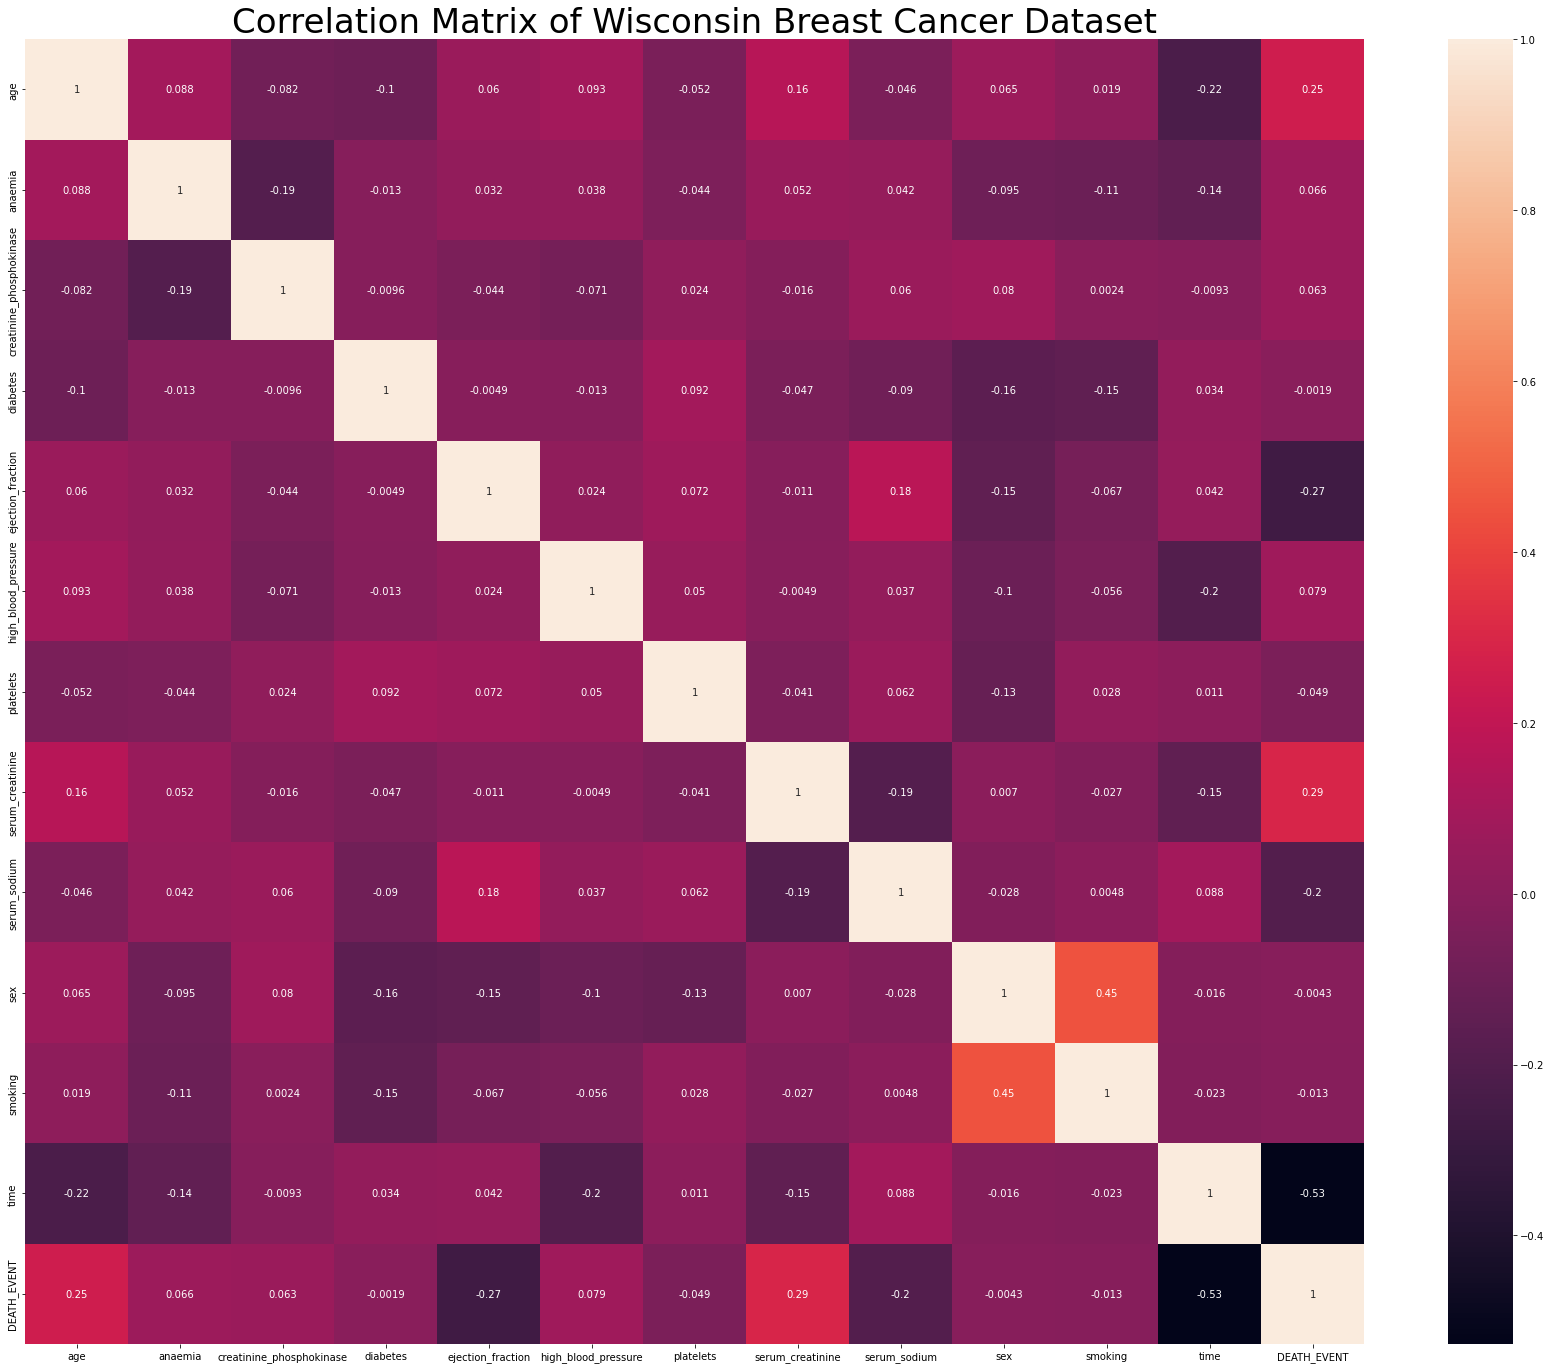

In [16]:
print(df.shape)
corrMatrix = df.corr()
print(corrMatrix)
numbersAbove90 = 0
numbersAbove80 = 0
for index, row in corrMatrix.iterrows():
    for cell in row:
        if cell > 0.9:
            numbersAbove90 += 1
        if cell > 0.8:
            numbersAbove80 += 1

print('Correlation Matrix Size: {}'.format(corrMatrix.shape))
print('Number of Entries: {}'.format(corrMatrix.shape[0] * corrMatrix.shape[1]))
print('Correlations Over 90: {}'.format(numbersAbove90 - len(cols)))
print('Correlations Over 80: {}'.format(numbersAbove80 - len(cols)))
try:
    sn.heatmap(corrMatrix, annot=True)
except ValueError:  #raised if `y` is empty.
    print('no')
plt.rcParams["figure.figsize"] = (30, 24)
plt.title('Correlation Matrix of Wisconsin Breast Cancer Dataset', fontdict={'fontsize': 34})
plt.show()


Correlation Matrix Size: (16, 16)
Number of Entries: 256
Correlations Over 90: 8
Correlations Over 80: 22


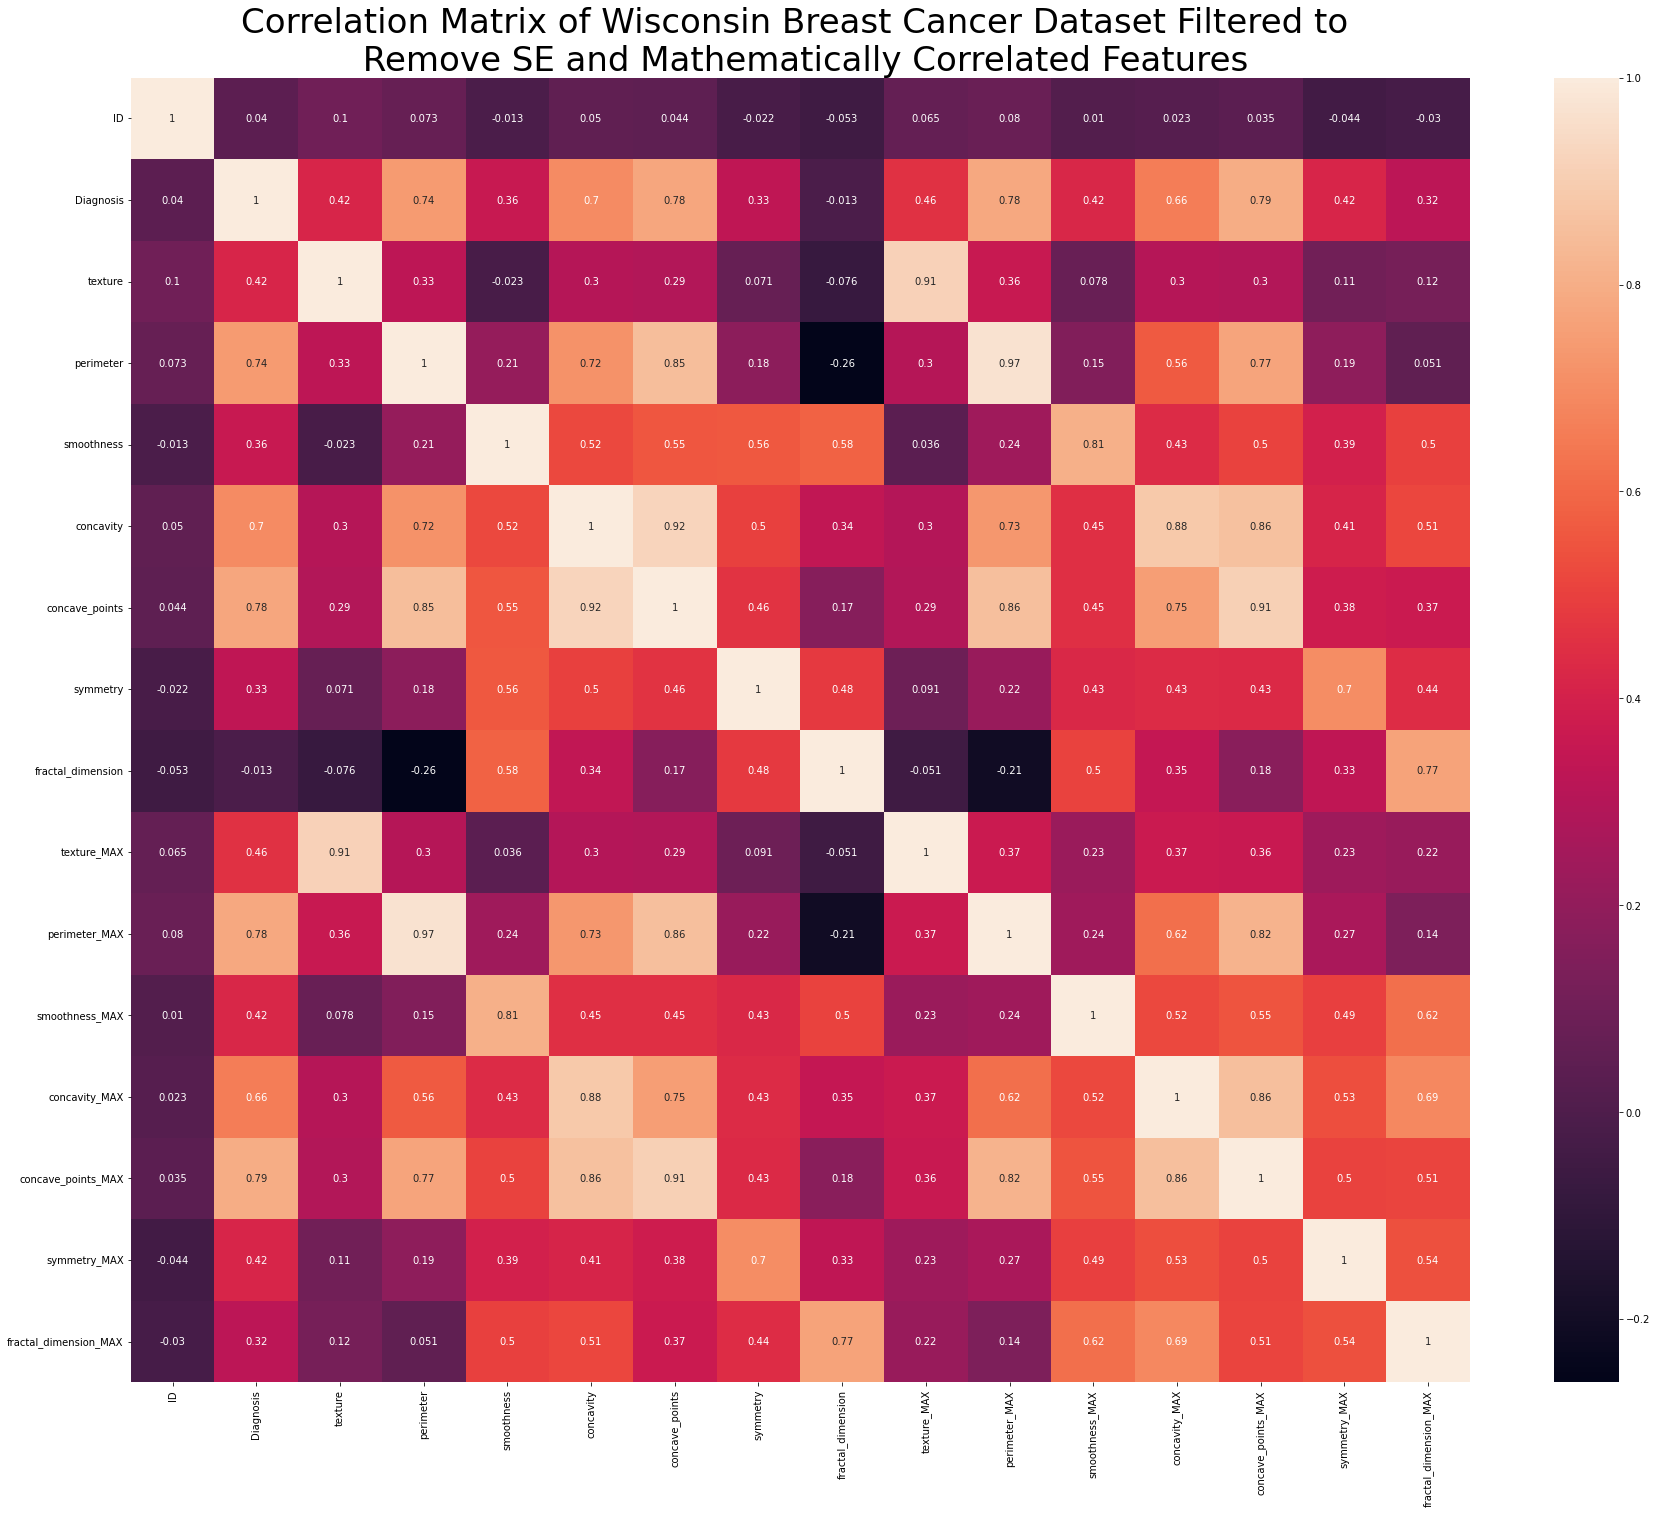

In [8]:
newCols = cols[:12] + cols[22:]     # Removes SE Values
newCols.remove('compactness')       # Compactness is a calculated value of Perimeter ^ 2 / Area
newCols.remove('compactness_MAX')
newCols.remove('radius')            # Radius has a correlation of 1 with peremiter
newCols.remove('radius_MAX')
newCols.remove('area')              # Radius has a correlation of 1 with peremiter
newCols.remove('area_MAX')          # Perimeter is also directly related to area
newDF = df[newCols]
corrMatrix = newDF.corr()
numbersAbove90 = 0
numbersAbove80 = 0
for index, row in corrMatrix.iterrows():
    for cell in row:
        if cell > 0.9:
            numbersAbove90 += 1
        if cell > 0.8:
            numbersAbove80 += 1

print('Correlation Matrix Size: {}'.format(corrMatrix.shape))
print('Number of Entries: {}'.format(corrMatrix.shape[0] * corrMatrix.shape[1]))
print('Correlations Over 90: {}'.format(numbersAbove90 - len(newCols)))
print('Correlations Over 80: {}'.format(numbersAbove80 - len(newCols)))
sn.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (30, 24)
plt.title('Correlation Matrix of Wisconsin Breast Cancer Dataset Filtered to \n Remove SE and Mathematically Correlated Features', fontdict={'fontsize': 34})
plt.show()